<a href="https://colab.research.google.com/github/rushikeshchopaderc/ChestAiScripts/blob/main/ManipalBinaryClassificarionLoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
manipal_df=pd.read_excel('/content/CAD_Reader B_Study (2).xlsx', engine='openpyxl')
manipal_df=manipal_df[['ID','calcification','cardiomegaly','consolidation','fibrosis','pleural_effusion','atelectasis','TB_screen']]
manipal_df

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,ID,calcification,cardiomegaly,consolidation,fibrosis,pleural_effusion,atelectasis,TB_screen
0,3033647,0,1,0,0,0,0,0
1,3034173,0,0,0,0,1,0,0
2,3034396,0,0,0,0,1,0,0
3,3034733,0,0,0,0,0,0,0
4,3035475,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
490,3127233,0,0,1,0,0,0,0
491,3128247,0,0,0,1,0,0,1
492,3128949,0,0,1,0,0,0,0
493,5027995,0,0,0,1,0,0,1


In [ ]:
chestai_results_df=pd.read_csv('/content/ChestAi-Testing-Results.csv')
# Selecting only the relevant part to create the mapping ID
chestai_results_df['ID']=chestai_results_df['Label'].str[-8:-1]
chestai_results_df=chestai_results_df[['ID','atelectasis','calcification','cardiomegaly','consolidation','effusion','fibrosis','TB']]
chestai_results_df[['atelectasis','calcification','cardiomegaly','consolidation','effusion','fibrosis','TB']]=chestai_results_df[['atelectasis','calcification','cardiomegaly','consolidation','effusion','fibrosis','TB']]/100
chestai_results_df

,ID,atelectasis,calcification,cardiomegaly,consolidation,effusion,fibrosis,TB
0,3047566,0.647098,0.831109,0.725652,0.537159,0.607676,0.171740,0.391110
1,3097079,0.528422,0.008997,0.570043,0.539977,0.596604,0.327479,0.416960
2,3112845,0.581551,0.438767,0.790063,0.530449,0.767965,0.290582,0.414416
3,3115428,0.514082,0.020872,0.681892,0.537604,0.602973,0.351199,0.416268
4,3098495,0.580201,0.350699,0.897821,0.692274,0.536901,0.170896,0.383721
...,...,...,...,...,...,...,...,...
195,3130235,0.562314,0.657571,0.113543,0.638636,0.353545,0.408574,0.393081
196,3092430,0.810621,0.230477,0.974812,0.792941,0.366626,0.477939,0.422541
197,3050148,0.548678,0.805535,0.864604,0.540131,0.771333,0.325188,0.408548
198,3065872,0.543055,0.789157,0.676984,0.536496,0.442198,0.301816,0.415703


In [ ]:
# Manipal has provided 400 labels in the excel but shared only 200 images and shared 1 image whose description is unavailable in the excel
manipal_df['ID']=manipal_df['ID'].astype(str)
final_df=chestai_results_df.merge(manipal_df, on='ID', how='inner')
final_df

,ID,atelectasis_x,calcification_x,cardiomegaly_x,consolidation_x,effusion,fibrosis_x,TB,calcification_y,cardiomegaly_y,consolidation_y,fibrosis_y,pleural_effusion,atelectasis_y,TB_screen
0,3047566,0.647098,0.831109,0.725652,0.537159,0.607676,0.171740,0.391110,0,0,0,1,0,0,1
1,3097079,0.528422,0.008997,0.570043,0.539977,0.596604,0.327479,0.416960,0,0,0,0,1,0,0
2,3112845,0.581551,0.438767,0.790063,0.530449,0.767965,0.290582,0.414416,0,1,0,1,0,0,0
3,3115428,0.514082,0.020872,0.681892,0.537604,0.602973,0.351199,0.416268,0,0,0,0,0,0,0
4,3098495,0.580201,0.350699,0.897821,0.692274,0.536901,0.170896,0.383721,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,3130235,0.562314,0.657571,0.113543,0.638636,0.353545,0.408574,0.393081,0,0,0,0,0,0,0
195,3092430,0.810621,0.230477,0.974812,0.792941,0.366626,0.477939,0.422541,0,0,1,0,0,0,0
196,3050148,0.548678,0.805535,0.864604,0.540131,0.771333,0.325188,0.408548,0,1,0,0,1,0,0
197,3065872,0.543055,0.789157,0.676984,0.536496,0.442198,0.301816,0.415703,0,1,1,1,1,0,1


In [ ]:
# Plotting log

In [ ]:
# Classification log Cost function=-1/n(∑((y_actuallog(ypredicted) + (1- y_actual)log(1-y_predicted))
# Example=-1/199(∑(1(log(0.9)+(1-1)(log(1-0.9)))))

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss                # This is Binary cross Entropy loss (The default loss of image classification algorithm)
from matplotlib import pyplot as plt

atalectasis_loss=log_loss(final_df['atelectasis_y'],final_df['atelectasis_x'])
calcification_loss=log_loss(final_df['calcification_y'],final_df['calcification_x'])
consolidation_loss=log_loss(final_df['consolidation_y'],final_df['consolidation_x'])
cardiomegaly_loss=log_loss(final_df['cardiomegaly_y'],final_df['cardiomegaly_x'])
effusion_loss=log_loss(final_df['pleural_effusion'],final_df['effusion'])
fibrosis_loss=log_loss(final_df['fibrosis_y'], final_df['fibrosis_x'])
tb_loss=log_loss(final_df['TB_screen'],final_df['TB'])
print('atalectasis_loss',atalectasis_loss)
print('calcification_loss',calcification_loss)
print('consolidation_loss',consolidation_loss)
print('cardiomegaly_loss',cardiomegaly_loss)
print('effusion_loss',effusion_loss)
print('fibrosis_loss',fibrosis_loss)
print('tb_loss',tb_loss)



atalectasis_loss 0.9040177073974814
calcification_loss 0.8763249694039857
consolidation_loss 0.8211393705180288
cardiomegaly_loss 1.2718641649267823
effusion_loss 0.7852930118883378
fibrosis_loss 0.5723473434688519
tb_loss 0.5876008668708578


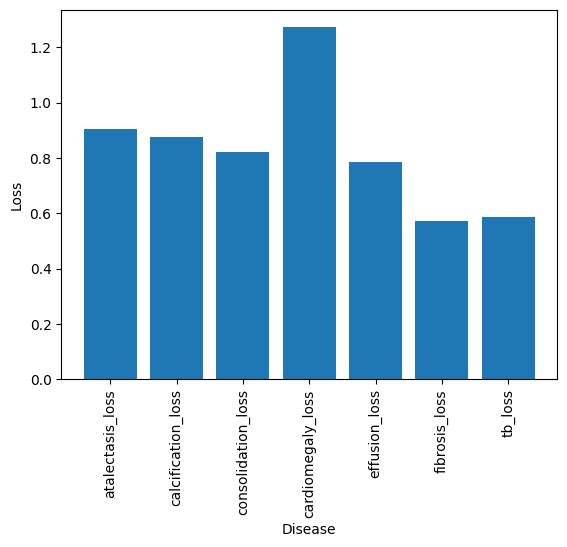

In [ ]:
from matplotlib import pyplot as plt
plt.bar(['atalectasis','calcification','consolidation','cardiomegaly','effusion','fibrosis','tb'],[atalectasis_loss,calcification_loss,consolidation_loss,cardiomegaly_loss,effusion_loss,fibrosis_loss,tb_loss])
plt.ylabel('Loss')
plt.xlabel('Disease')
plt.xticks(rotation=90)
plt.show()

In [ ]:
threshold = 0.7
final_df['atelectasis_x_binary'] = (final_df['atelectasis_x'] >= threshold).astype(int)
final_df['calcification_x_binary'] = (final_df['calcification_x'] >= threshold).astype(int)
final_df['consolidation_x_binary'] = (final_df['consolidation_x'] >= threshold).astype(int)
final_df['cardiomegaly_x_binary'] = (final_df['cardiomegaly_x'] >= threshold).astype(int)
final_df['effusion_binary'] = (final_df['effusion'] >= threshold).astype(int)
final_df['fibrosis_x_binary'] = (final_df['fibrosis_x'] >= threshold).astype(int)
final_df['TB_binary'] = (final_df['TB'] >= threshold).astype(int)

atalectasis_acc=accuracy_score(final_df['atelectasis_y'],final_df['atelectasis_x_binary'])*100
calcification_acc=accuracy_score(final_df['calcification_y'],final_df['calcification_x_binary'])*100
consolidation_acc=accuracy_score(final_df['consolidation_y'],final_df['consolidation_x_binary'])*100
cardiomegaly_acc=accuracy_score(final_df['cardiomegaly_y'],final_df['cardiomegaly_x_binary'])*100
effusion_acc=accuracy_score(final_df['pleural_effusion'],final_df['effusion_binary'])*100
fibrosis_acc=accuracy_score(final_df['fibrosis_y'], final_df['fibrosis_x_binary'])*100
tb_acc=accuracy_score(final_df['TB_screen'],final_df['TB_binary'])*100

print('atalectasis_acc',atalectasis_acc)
print('calcification_acc',calcification_acc)
print('consolidation_acc',consolidation_acc)
print('cardiomegaly_acc',cardiomegaly_acc)
print('effusion_acc',effusion_acc)
print('fibrosis_acc',fibrosis_acc)
print('tb_acc',tb_acc)

atalectasis_acc 85.92964824120602
calcification_acc 73.36683417085426
consolidation_acc 64.82412060301507
cardiomegaly_acc 53.266331658291456
effusion_acc 64.82412060301507
fibrosis_acc 82.41206030150754
tb_acc 82.91457286432161


In [ ]:
# Model Accuracies for the diseases after CLR
model_accuracies={'atalectasis':79.59,'calcification':94.14,'consolidation':73.32,'cardiomegaly':75.78, 'effusion':86.53,'fibrosis':88.96,'tb':95}
mainpal_accuracies={'atalectasis':85.92,'calcification':73.36, 'consolidation':64.82, 'cardiomegaly':53.26, 'effusion':64.82, 'fibrosis':82.41, 'tb':82.91}

# References: CLR Paper -atalectasis,calcification,consolidation,fibrosis,effusion,cardiomegaly | TB Paper

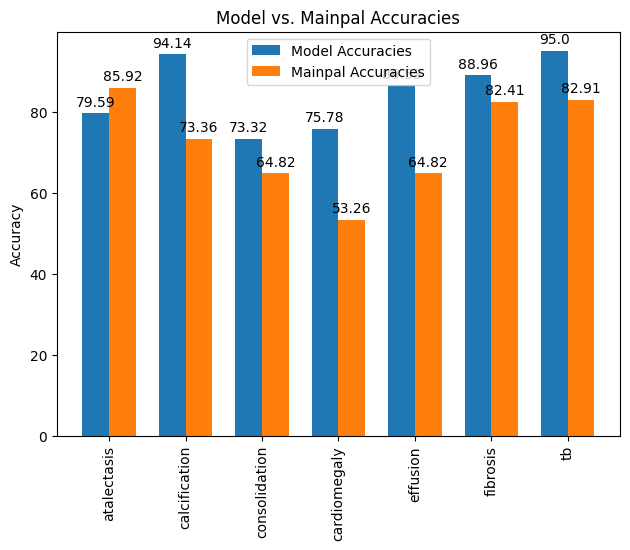

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

model_accuracies={'atalectasis':79.59,'calcification':94.14,'consolidation':73.32,'cardiomegaly':75.78, 'effusion':86.53,'fibrosis':88.96,'tb':95}
mainpal_accuracies={'atalectasis':85.92,'calcification':73.36, 'consolidation':64.82, 'cardiomegaly':53.26, 'effusion':64.82, 'fibrosis':82.41, 'tb':82.91}

diseases = list(model_accuracies.keys())
model_accuracy_values = list(model_accuracies.values())
mainpal_accuracy_values = list(mainpal_accuracies.values())

width = 0.35  # the width of the bars

x = np.arange(len(diseases))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, model_accuracy_values, width, label='Model Accuracies')
rects2 = ax.bar(x + width/2, mainpal_accuracy_values, width, label='Mainpal Accuracies')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Model vs. Mainpal Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(diseases)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.xticks(rotation=90)
plt.show()